<a href="https://colab.research.google.com/github/plerte/NN/blob/master/CNN_%2B_Bi_LS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
seq_len = 128

Tensorflow version: 2.4.1


In [9]:
def Inception_A(layer_in, c7):
  branch1x1_1 = Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
  branch1x1 = BatchNormalization()(branch1x1_1)
  branch1x1 = ReLU()(branch1x1)
  
  branch5x5_1 = Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(layer_in)
  branch5x5 = BatchNormalization()(branch5x5_1)
  branch5x5 = ReLU()(branch5x5)
  branch5x5 = Conv1D(c7, kernel_size=5, padding='same', use_bias=False)(branch5x5)
  branch5x5 = BatchNormalization()(branch5x5)
  branch5x5 = ReLU()(branch5x5)  
  
  branch3x3_1 = Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(layer_in)
  branch3x3 = BatchNormalization()(branch3x3_1)
  branch3x3 = ReLU()(branch3x3)
  branch3x3 = Conv1D(c7, kernel_size=3, padding='same', use_bias=False)(branch3x3)
  branch3x3 = BatchNormalization()(branch3x3)
  branch3x3 = ReLU()(branch3x3)
  branch3x3 = Conv1D(c7, kernel_size=3, padding='same', use_bias=False)(branch3x3)
  branch3x3 = BatchNormalization()(branch3x3)
  branch3x3 = ReLU()(branch3x3) 
  
  branch_pool = AveragePooling1D(pool_size=(3), strides=1, padding='same')(layer_in)
  branch_pool = Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(branch_pool)
  branch_pool = BatchNormalization()(branch_pool)
  branch_pool = ReLU()(branch_pool)
  outputs = Concatenate(axis=-1)([branch1x1, branch5x5, branch3x3, branch_pool])
  return outputs


def Inception_B(layer_in, c7):
  branch3x3 = Conv1D(c7, kernel_size=3, padding="same", strides=2, use_bias=False)(layer_in)
  branch3x3 = BatchNormalization()(branch3x3)
  branch3x3 = ReLU()(branch3x3)  
  
  branch3x3dbl = Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
  branch3x3dbl = BatchNormalization()(branch3x3dbl)
  branch3x3dbl = ReLU()(branch3x3dbl)  
  branch3x3dbl = Conv1D(c7, kernel_size=3, padding="same", use_bias=False)(branch3x3dbl)  
  branch3x3dbl = BatchNormalization()(branch3x3dbl)
  branch3x3dbl = ReLU()(branch3x3dbl)  
  branch3x3dbl = Conv1D(c7, kernel_size=3, padding="same", strides=2, use_bias=False)(branch3x3dbl)    
  branch3x3dbl = BatchNormalization()(branch3x3dbl)
  branch3x3dbl = ReLU()(branch3x3dbl)   
  
  branch_pool = MaxPooling1D(pool_size=3, strides=2, padding="same")(layer_in)
  
  outputs = Concatenate(axis=-1)([branch3x3, branch3x3dbl, branch_pool])
  return outputs


def Inception_C(layer_in, c7):
  branch1x1_1 = Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
  branch1x1 = BatchNormalization()(branch1x1_1)
  branch1x1 = ReLU()(branch1x1)   
  
  branch7x7_1 = Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
  branch7x7 = BatchNormalization()(branch7x7_1)
  branch7x7 = ReLU()(branch7x7)   
  branch7x7 = Conv1D(c7, kernel_size=(7), padding="same", use_bias=False)(branch7x7)
  branch7x7 = BatchNormalization()(branch7x7)
  branch7x7 = ReLU()(branch7x7)  
  branch7x7 = Conv1D(c7, kernel_size=(1), padding="same", use_bias=False)(branch7x7)  
  branch7x7 = BatchNormalization()(branch7x7)
  branch7x7 = ReLU()(branch7x7)   

  branch7x7dbl_1 = Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)  
  branch7x7dbl = BatchNormalization()(branch7x7dbl_1)
  branch7x7dbl = ReLU()(branch7x7dbl)  
  branch7x7dbl = Conv1D(c7, kernel_size=(7), padding="same", use_bias=False)(branch7x7dbl)  
  branch7x7dbl = BatchNormalization()(branch7x7dbl)
  branch7x7dbl = ReLU()(branch7x7dbl) 
  branch7x7dbl = Conv1D(c7, kernel_size=(1), padding="same", use_bias=False)(branch7x7dbl)  
  branch7x7dbl = BatchNormalization()(branch7x7dbl)
  branch7x7dbl = ReLU()(branch7x7dbl)  
  branch7x7dbl = Conv1D(c7, kernel_size=(7), padding="same", use_bias=False)(branch7x7dbl)  
  branch7x7dbl = BatchNormalization()(branch7x7dbl)
  branch7x7dbl = ReLU()(branch7x7dbl)  
  branch7x7dbl = Conv1D(c7, kernel_size=(1), padding="same", use_bias=False)(branch7x7dbl)  
  branch7x7dbl = BatchNormalization()(branch7x7dbl)
  branch7x7dbl = ReLU()(branch7x7dbl)  
  
  branch_pool = AveragePooling1D(pool_size=3, strides=1, padding='same')(layer_in)
  branch_pool = Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(branch_pool)
  branch_pool = BatchNormalization()(branch_pool)
  branch_pool = ReLU()(branch_pool)  
  
  outputs = Concatenate(axis=-1)([branch1x1, branch7x7, branch7x7dbl, branch_pool])
  return outputs

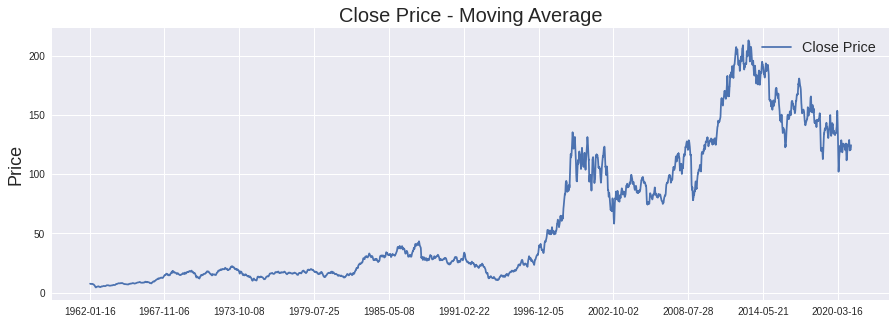

In [10]:
IBM_path = '/content/drive/MyDrive/coursework/shares_IBM.csv'
df = pd.read_csv(IBM_path, delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
# Replace 0 to avoid dividing by 0 later on
df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
df.sort_values('Date', inplace=True)

# Apply moving average with a window of 10 days to all columns
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(10).mean() 

# Drop all rows with NaN values
df.dropna(how='any', axis=0, inplace=True) 

df.head()
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.xticks(range(0, df.shape[0], 1464), df['Date'].loc[::1464], rotation=0)
plt.ylabel('Price', fontsize=18)
plt.title("Close Price - Moving Average", fontsize=20)
plt.legend(['Close Price'], fontsize='x-large', loc='best')
plt.show()

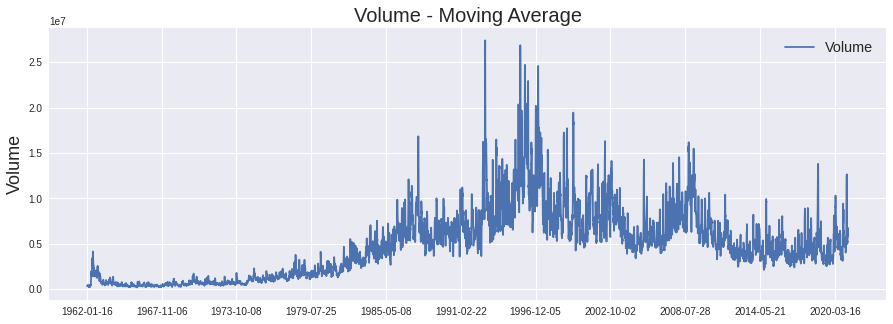

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(df['Volume'])
plt.xticks(range(0, df.shape[0], 1464), df['Date'].loc[::1464], rotation=0)
plt.ylabel('Volume', fontsize=18)
plt.title("Volume - Moving Average", fontsize=20)
plt.legend(['Volume'], fontsize='x-large', loc='best')
plt.show()

In [12]:
# '''Calculate percentage change'''

# df['Open'] = df['Open'].pct_change() # Create arithmetic returns column
# df['High'] = df['High'].pct_change() # Create arithmetic returns column
# df['Low'] = df['Low'].pct_change() # Create arithmetic returns column
# df['Close'] = df['Close'].pct_change() # Create arithmetic returns column
# df['Volume'] = df['Volume'].pct_change()

# df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

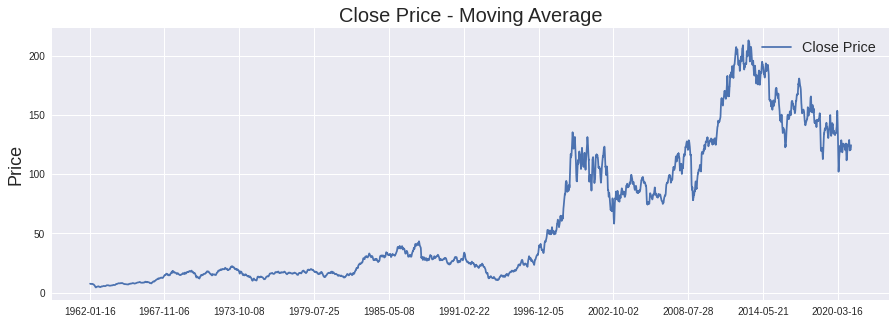

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.xticks(range(0, df.shape[0], 1464), df['Date'].loc[::1464], rotation=0)
plt.ylabel('Price', fontsize=18)
plt.title("Close Price - Moving Average", fontsize=20)
plt.legend(['Close Price'], fontsize='x-large', loc='best')
plt.show()

In [14]:

###############################################################################
'''Normalize price columns'''

# min_return = min(df[['Open', 'High', 'Low', 'Close']].min(axis=0))
# max_return = max(df[['Open', 'High', 'Low', 'Close']].max(axis=0))
# print(min_return)
# print(max_return)

min_open = df['Open'].min(axis=0)
max_open = df['Open'].max(axis=0)
min_high = df['High'].min(axis=0)
max_high = df['High'].max(axis=0)
min_low = df['Low'].min(axis=0)
max_low = df['Low'].max(axis=0)
min_close = df['Close'].min(axis=0)
max_close = df['Close'].max(axis=0)


# Min-max normalize price columns (0-1 range)
# df['Open'] = (df['Open'] - min_return) / (max_return - min_return)
# df['High'] = (df['High'] - min_return) / (max_return - min_return)
# df['Low'] = (df['Low'] - min_return) / (max_return - min_return)
# df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

df['Open'] = (df['Open'] - min_open) / (max_open - min_open)
df['High'] = (df['High'] - min_high) / (max_high - min_high)
df['Low'] = (df['Low'] - min_low) / (max_low - min_low)
df['Close'] = (df['Close'] - min_close) / (max_close - min_close)
###############################################################################
'''Normalize volume column'''

min_volume = df['Volume'].min(axis=0)
max_volume = df['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
df['Volume'] = (df['Volume'] - min_volume) / (max_volume - min_volume)

df.head()

,Date,Open,High,Low,Close,Volume
9,1962-01-16,0.015348,0.014837,0.015746,0.015197,0.005907
10,1962-01-17,0.015259,0.014716,0.015605,0.015034,0.006375
11,1962-01-18,0.015105,0.014599,0.015489,0.014918,0.006788
12,1962-01-19,0.014994,0.014497,0.015412,0.014876,0.006926
13,1962-01-22,0.014955,0.014494,0.015457,0.014895,0.005934


In [15]:
###############################################################################
'''sorting'''

times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

print('after sorting')
df.head()

after sorting


,Date,Open,High,Low,Close,Volume
9,1962-01-16,0.015348,0.014837,0.015746,0.015197,0.005907
10,1962-01-17,0.015259,0.014716,0.015605,0.015034,0.006375
11,1962-01-18,0.015105,0.014599,0.015489,0.014918,0.006788
12,1962-01-19,0.014994,0.014497,0.015412,0.014876,0.006926
13,1962-01-22,0.014955,0.014494,0.015457,0.014895,0.005934


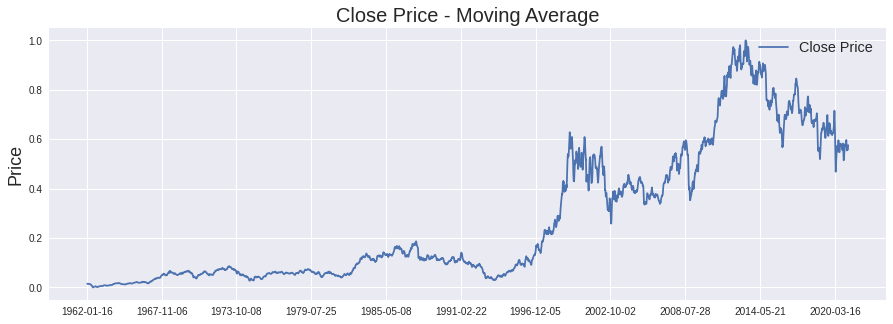

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.xticks(range(0, df.shape[0], 1464), df['Date'].loc[::1464], rotation=0)
plt.ylabel('Price', fontsize=18)
plt.title("Close Price - Moving Average", fontsize=20)
plt.legend(['Close Price'], fontsize='x-large', loc='best')
plt.show()

In [17]:
###############################################################################
'''Create training, validation and test split'''

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

# Remove date column
df_train.drop(columns=['Date'], inplace=True)
df_val.drop(columns=['Date'], inplace=True)
df_test.drop(columns=['Date'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

df_train.head()

Training data shape: (11914, 5)
Validation data shape: (1489, 5)
Test data shape: (1489, 5)


,Open,High,Low,Close,Volume
9,0.015348,0.014837,0.015746,0.015197,0.005907
10,0.015259,0.014716,0.015605,0.015034,0.006375
11,0.015105,0.014599,0.015489,0.014918,0.006788
12,0.014994,0.014497,0.015412,0.014876,0.006926
13,0.014955,0.014494,0.015457,0.014895,0.005934


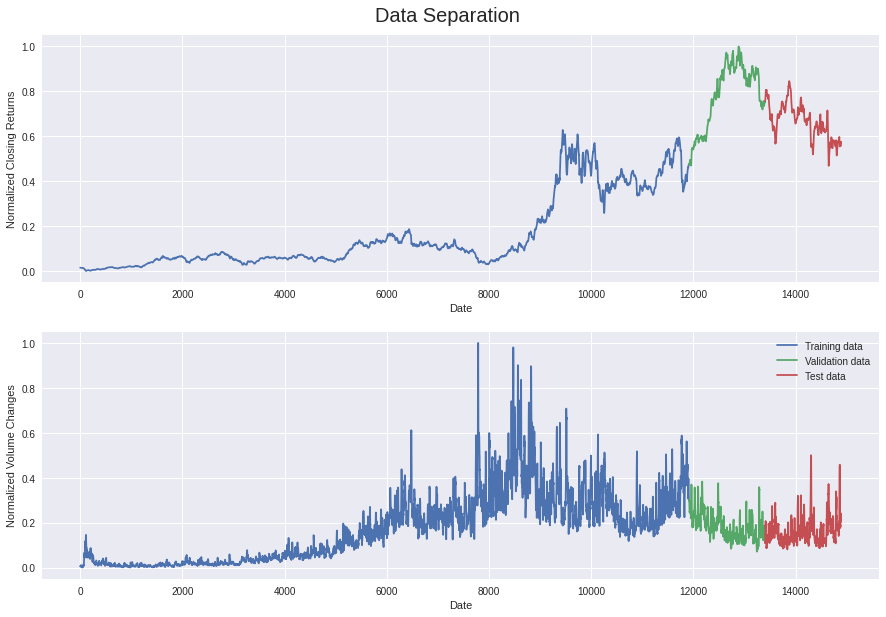

In [18]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.92)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')

plt.legend(loc='best')

In [19]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(11786, 128, 5) (11786,)
(1361, 128, 5) (1361,)


In [20]:
def create_model():
  in_seq = Input(shape=(seq_len, 5))

  x = Inception_A(in_seq, 32)
  x = Inception_A(x, 32)
  x = Inception_B(x, 32)
  x = Inception_B(x, 32)
  x = Inception_C(x, 32)
  x = Inception_C(x, 32)    
          
  x = Bidirectional(LSTM(128, return_sequences=True))(x)
  x = Bidirectional(LSTM(128, return_sequences=True))(x)
  x = Bidirectional(LSTM(64, return_sequences=True))(x) 
          
  avg_pool = GlobalAveragePooling1D()(x)
  max_pool = GlobalMaxPooling1D()(x)
  conc = concatenate([avg_pool, max_pool])
  conc = Dense(64, activation="relu")(conc)
  out = Dense(1, activation="sigmoid")(conc)      

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss="mse", optimizer="adam", metrics=['mae', 'mape'])     
  return model

model = create_model()

#model.summary()
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
callback = tf.keras.callbacks.ModelCheckpoint('CNN+Bi-LSTM.hdf5', monitor='val_loss', save_best_only=True, verbose=1)

model.fit(X_train, y_train,
              batch_size=2048,
              verbose=2,
              callbacks=[callback],
              epochs=200,
              #shuffle=True,
              validation_data=(X_val, y_val),)    

# model = tf.keras.models.load_model('/content/CNN+Bi-LSTM.hdf5')

###############################################################################
'''Calculate predictions and metrics'''

#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

###############################################################################


Epoch 1/200
6/6 - 25s - loss: 0.0349 - mae: 0.1332 - mape: 332.8077 - val_loss: 0.1377 - val_mae: 0.3514 - val_mape: 42.0623

Epoch 00001: val_loss improved from inf to 0.13774, saving model to CNN+Bi-LSTM.hdf5
Epoch 2/200
6/6 - 3s - loss: 0.0023 - mae: 0.0373 - mape: 53.4044 - val_loss: 0.1504 - val_mae: 0.3744 - val_mape: 45.3936

Epoch 00002: val_loss did not improve from 0.13774
Epoch 3/200
6/6 - 3s - loss: 8.7323e-04 - mae: 0.0223 - mape: 47.9602 - val_loss: 0.1532 - val_mae: 0.3779 - val_mape: 45.8341

Epoch 00003: val_loss did not improve from 0.13774
Epoch 4/200
6/6 - 3s - loss: 6.8400e-04 - mae: 0.0184 - mape: 54.1274 - val_loss: 0.1758 - val_mae: 0.4091 - val_mape: 50.0348

Epoch 00004: val_loss did not improve from 0.13774
Epoch 5/200
6/6 - 3s - loss: 4.9761e-04 - mae: 0.0162 - mape: 39.0000 - val_loss: 0.2000 - val_mae: 0.4397 - val_mape: 54.1800

Epoch 00005: val_loss did not improve from 0.13774
Epoch 6/200
6/6 - 3s - loss: 4.0832e-04 - mae: 0.0148 - mape: 33.1635 - val_l

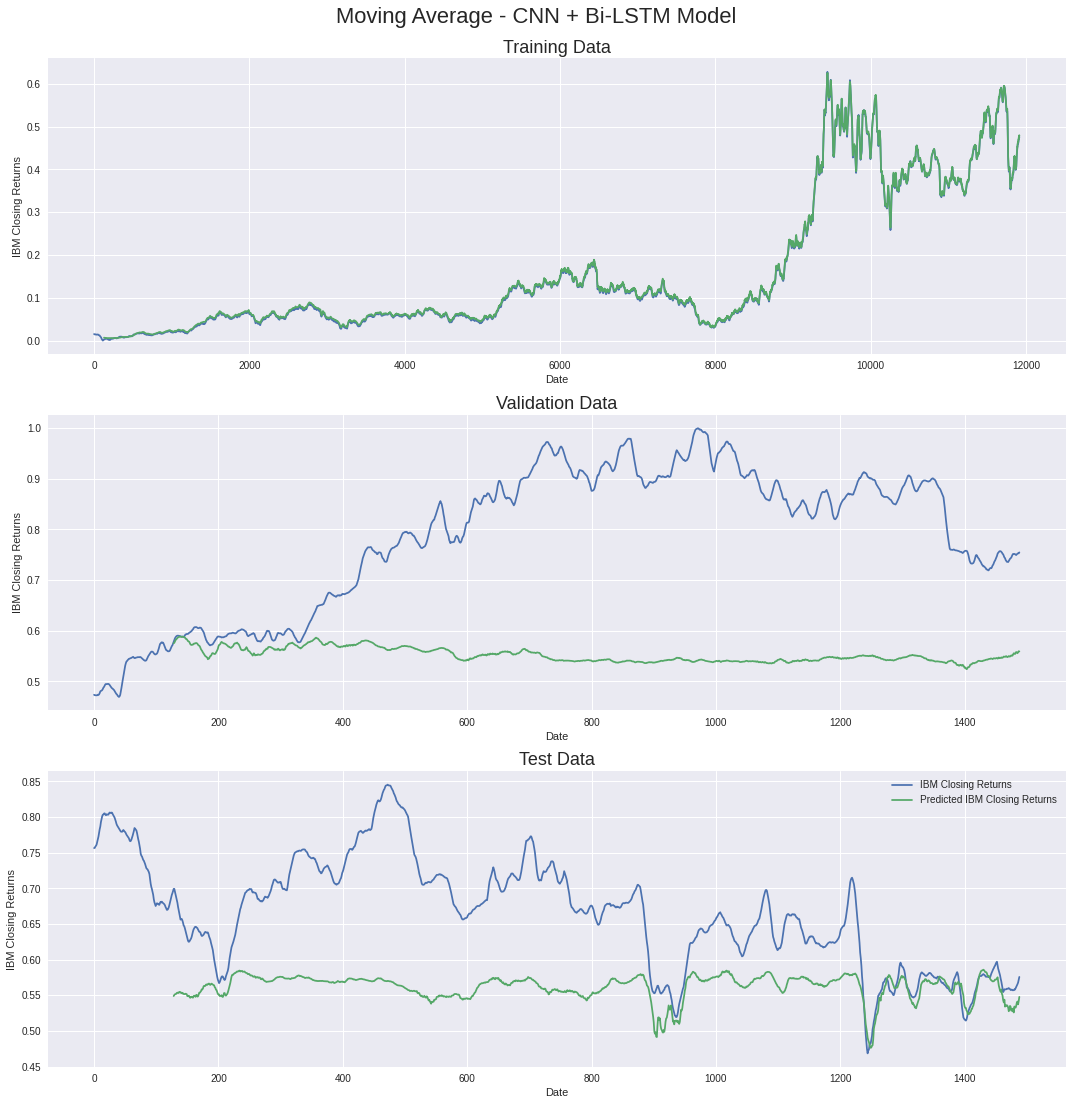

In [21]:
'''Display results'''

fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Moving Average - CNN + Bi-LSTM Model", fontsize=22)
st.set_y(1.02)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='IBM Closing Returns')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len),train_pred, label='Predicted IBM Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('IBM Closing Returns')

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='IBM Closing Returns')
ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len),val_pred, label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('IBM Closing Returns')

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='IBM Closing Returns')
ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('IBM Closing Returns')
 
plt.tight_layout()
plt.legend(loc='best')

In [22]:
test_pred = model.predict(X_test)
print(X_test.shape)
print(test_pred.shape)
print(y_test.shape)

(1361, 128, 5)
(1361, 1)
(1361,)


In [23]:
IBM_path = '/content/drive/MyDrive/coursework/test_IBM.csv'
exp = pd.read_csv(IBM_path, delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
gr =  pd.read_csv(IBM_path, delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
# gr = gr[(gr.index >= 128)]
# Replace 0 to avoid dividing by 0 later on
exp['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
exp.sort_values('Date', inplace=True)
exp.tail()

t_min2 = exp['Close'].min()
t_max2 = exp['Close'].max()
print("max close = ", t_max2)
print("min close = ", t_min2)

# exp['Open'] = exp['Open'].pct_change() # Create arithmetic returns column
# exp['High'] = exp['High'].pct_change() # Create arithmetic returns column
# exp['Low'] = exp['Low'].pct_change() # Create arithmetic returns column
# exp['Close'] = exp['Close'].pct_change() # Create arithmetic returns column
# exp['Volume'] = exp['Volume'].pct_change()



exp.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values


###############################################################################
'''Normalize price columns'''

min_return = min(exp[['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(exp[['Open', 'High', 'Low', 'Close']].max(axis=0))


# Min-max normalize price columns (0-1 range)
exp['Open'] = (exp['Open'] - min_return) / (max_return - min_return)
exp['High'] = (exp['High'] - min_return) / (max_return - min_return)
exp['Low'] = (exp['Low'] - min_return) / (max_return - min_return)
exp['Close'] = (exp['Close'] - min_return) / (max_return - min_return)

###############################################################################
'''Normalize volume column'''

min_volume = exp['Volume'].min(axis=0)
max_volume = exp['Volume'].max(axis=0)
times2 = sorted(exp.index.values)
# Min-max normalize volume columns (0-1 range)
exp['Volume'] = (exp['Volume'] - min_volume) / (max_volume - min_volume)

exp.drop(columns=['Date'], inplace=True)

exp_test2 = exp #[(exp.index >= 127)]

# Convert pandas columns into arrays
exp_test2 = exp_test2.values
print(exp_test2.shape)
X_test2, y_test2 = [], []
for i in range(seq_len, len(exp_test2)):
    X_test2.append(exp_test2[i-n:i])
    y_test2.append(exp_test2[:, 3][i]) 
X_test2, y_test2 = np.array(X_test2), np.array(y_test2)

print(X_test2.shape)
print("max close = ", t_max2)
print("min close = ", t_min2)

max close =  136.380005
min close =  106.650002
(251, 5)


NameError: ignored

In [ ]:
test_pred2 = model.predict(X_test2)
# print(model.predict(X_test2))
o2 = model.predict(X_test2)*(t_max2-t_min2)+t_min2
# print(o2)
o3 = y_test2*(t_max2-t_min2)+t_min2
print(test_pred2.shape)
print(test_pred2[0][0],' ',y_test2[0])

In [ ]:
fig = plt.figure(figsize=(25,25))
# print(len(test_pred2))
print(len(y_test2))
st = fig.suptitle("exp", fontsize=18)
st.set_y(0.92)
ax41 = fig.add_subplot(311)
ax41.plot(gr['Close'], label='IBM_test Closing Returns')
# np.arange(seq_len, test_pred2.shape[0]+seq_len),
ax41.plot(np.arange(seq_len, test_pred2.shape[0]+seq_len), o2, linewidth=3, label='Predicted IBM_test Closing Returns')
ax41.set_title("Test Data", fontsize=18)
ax41.set_xlabel('Date')
ax41.set_ylabel('IBM Closing Returns')
ax41.legend(loc="best", fontsize=18)